### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
!pip install ydata-profiling

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [7]:
#use ydata-profiling for EDA
profile = ProfileReport(data, title ='Data Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

2. Investigate the dataset for missing or problematic data.

In [9]:
#finding the percentage of data that's missing in each column 
data.isnull().sum() 
null_percentage = (data.isnull().sum())/len(data)*100
null_percentage


destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
#remove duplicate data and drop car column due to 99% of the data missing in the car column

data = data.drop_duplicates().drop(columns='car')

# Fill missing values with the most frequent value (mode) for each column
data['Bar'] = data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])

# print the shape of the cleaned dataset
print("Shape of the dataset after removing duplicates:", data.shape)

# Check for any remaining missing values
print(data.isnull().sum())
                                                   

Shape of the dataset after removing duplicates: (12610, 25)
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [13]:
#count the number of 1 and 0 and calculate the percentage of 1 (accepted) and 0 (rejected) 

count_values = data['Y'].value_counts()

# Calculate the percentages of 0s and 1s
percent_values = data['Y'].value_counts(normalize=True).mul(100).round(1)

# Print the counts and percentages
print(f"Counts:\n{count_values}")
print(f"\nPercentages:\n{percent_values}")


Counts:
Y
1    7157
0    5453
Name: count, dtype: int64

Percentages:
Y
1    56.8
0    43.2
Name: proportion, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

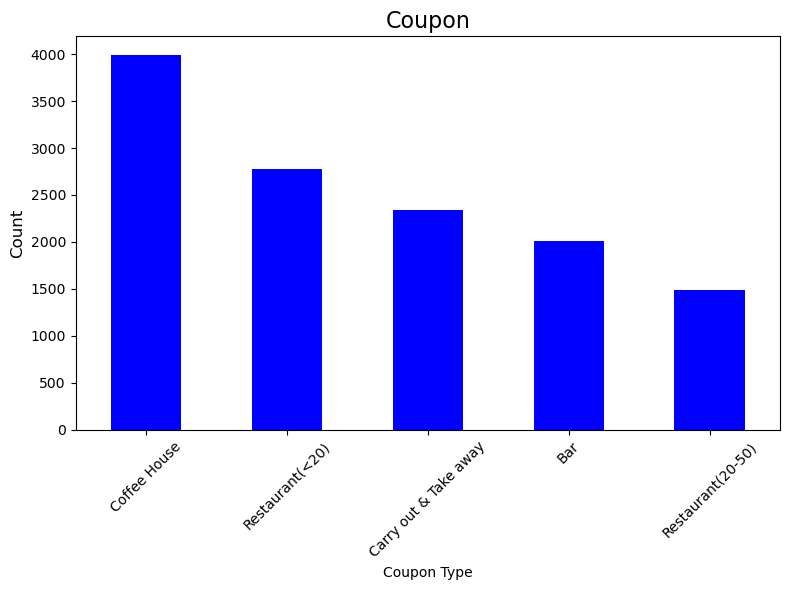

In [15]:
coupon_counts = data['coupon'].value_counts()

# Create a bar graph 
%matplotlib inline

coupon_counts.plot(kind='bar', figsize=(8, 6), color='blue')

# Add labels and title
plt.title('Coupon', fontsize=16)
plt.xlabel('Coupon Type', fontsize=10)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6. Use a histogram to visualize the temperature column.

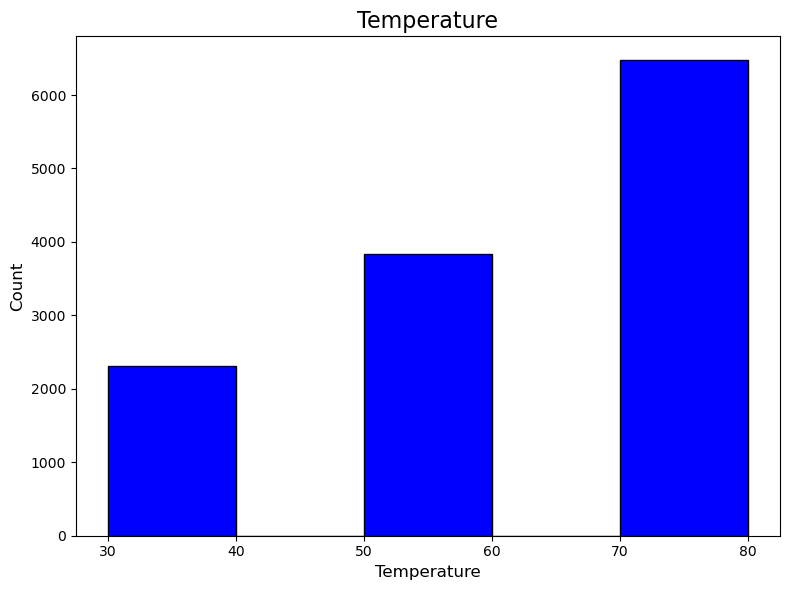

In [17]:
# Plot a histogram for the temperature column

data['temperature'].plot(kind='hist', bins=5, figsize=(8, 6), color='blue', edgecolor='black')

# Add labels and title
plt.title('Temperature', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
df_bar = data[data['coupon']=='Bar']
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [21]:
accepted_count = df_bar[df_bar['Y'] == 1].shape[0]
total_count = df_bar.shape[0]
percentage_of_bar_coupon = (accepted_count / total_count)*100
print(f'{percentage_of_bar_coupon:.2f}% of bar coupons were accepted')

41.00% of bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:
# separate the two groups: those go to the bar 3 or fewer times and those who go more than 3 times
df_3_or_less = data['Bar'].isin(['never', 'less1', '1~3'])
df_more_than_3 = data['Bar'].isin(['4~8', 'gt8'])

# Calculate acceptance rate for those who go to a bar 3 or fewer times
accepted_df_3_or_less = data[df_3_or_less & (data['Y'] == 1)].shape[0]
total_df_3_or_less = data[df_3_or_less].shape[0]
acceptance_rate_3_or_less = accepted_df_3_or_less / total_df_3_or_less 

# Calculate acceptance rate for those who go to a bar more than 3 times
accepted_df_more_than_3 = data[df_more_than_3 & (data['Y'] == 1)].shape[0]
total_df_more_than_3 = data[df_more_than_3].shape[0]
acceptance_rate_more_than_3 = accepted_df_more_than_3 / total_df_more_than_3 

# Display the results
print(f"Acceptance rate for those who go to a bar 3 or fewer times: {acceptance_rate_3_or_less:.2%}")
print(f"Acceptance rate for those who go to a bar more than 3 times: {acceptance_rate_more_than_3:.2%}")


Acceptance rate for those who go to a bar 3 or fewer times: 56.07%
Acceptance rate for those who go to a bar more than 3 times: 62.16%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
# Separate two groups: Drivers who go to a bar more than once a month and are over the age of 25 and the rest
df_bar_over_25 = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'].str.contains('26|31|36|41|46|50', regex=True))]

df_all_others = data[~((data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'].str.contains('26|31|36|41|46|50', regex=True)))]

# Calculate acceptance rate for the first group (bar more than once a month and age over 25)
accepted_df_bar_over_25 = df_bar_over_25[df_bar_over_25['Y'] == 1].shape[0]
total_df_bar_over_25 = df_bar_over_25.shape[0]
acceptance_rate_df_bar_over_25 = accepted_df_bar_over_25 / total_df_bar_over_25

# Calculate acceptance rate for all others
accepted_df_all_others = df_all_others[df_all_others['Y'] == 1].shape[0]
total_df_all_others = df_all_others.shape[0]
acceptance_rate_df_all_others = accepted_df_all_others / total_df_all_others

# Display the results
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_df_bar_over_25:.2%}")
print(f"Acceptance rate for all others: {acceptance_rate_df_all_others:.2%}")
print('Yes, there is a difference, the first group has a higher acceptance rate')

Acceptance rate for drivers who go to a bar more than once a month and are over 25: 62.02%
Acceptance rate for all others: 55.28%
Yes, there is a difference, the first group has a higher acceptance rate


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [27]:


# drivers who go to a bar more than once a month
bar_more_than_once = data['Bar'].isin(['1~3', '4~8', 'gt8'])

# drivers with passengers who are not kids, the word "passanger" is misspelled btw
passenger_not_kid = data['passanger'] != 'Kid(s)'

# drivers with occupations other than farming, fishing, or forestry
not_farming_fishing_forestry = ~data['occupation'].str.contains('Farming|Fishing|Forestry', case=False, na=False)

# Combine all conditions
group_condition = bar_more_than_once & passenger_not_kid & not_farming_fishing_forestry

# Define the complement group (all other drivers)
all_others_group = ~group_condition

# Calculate acceptance rate for the defined group (bar more than once, no kid passenger, not farming/fishing/forestry)
accepted_group = data[group_condition & (data['Y'] == 1)].shape[0]
total_group = data[group_condition].shape[0]
acceptance_rate_group = accepted_group / total_group 

# Calculate acceptance rate for all other drivers
accepted_all_others_group = data[all_others_group & (data['Y'] == 1)].shape[0]
total_all_others_group = data[all_others_group].shape[0]
acceptance_rate_all_others_group = accepted_all_others_group / total_all_others_group 


print(f"Acceptance rate for the group: {acceptance_rate_group:.2%}")
print(f"Acceptance rate for all others: {acceptance_rate_all_others_group:.2%}")


Acceptance rate for the group: 62.23%
Acceptance rate for all others: 54.50%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [29]:
# I chose the first group: Go to bars more than once a month, had passengers that are not kids and were not widowed 

bar_more_than_once = data['Bar'].isin(['1~3', '4~8', 'gt8'])  # Go to bars more than once a month
passenger_not_kid = data['passanger'] != 'Kid(s)'  # Passengers are not kids
not_widowed = data['maritalStatus'] != 'Widowed'  # Not widowed

# Combine all conditions using AND logic
group_condition = bar_more_than_once & passenger_not_kid & not_widowed

# Calculate acceptance rate for this group
accepted_group = data[group_condition & (data['Y'] == 1)].shape[0]
total_group = data[group_condition].shape[0]
acceptance_rate_group = accepted_group / total_group 

# Display the results
print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed: {acceptance_rate_group:.2%}")



Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed: 62.23%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Hypothesis: Drivers who go to bars more than once a month had a higher acceptance rate. I think this suggests that individuals who frequent bars may be more inclined to accept bar related promotions. Also drivers who had passengers other than kids also showed a higher acceptance rate. This might indicate that when people are with friends, partners, or other adults, they are more likely to engage in social activities like going to bars. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

age
21         23.278029
26         21.820010
31         14.781297
50plus     11.513323
36          9.451986
41          8.195073
46          5.530417
below21     5.429864
Name: proportion, dtype: float64


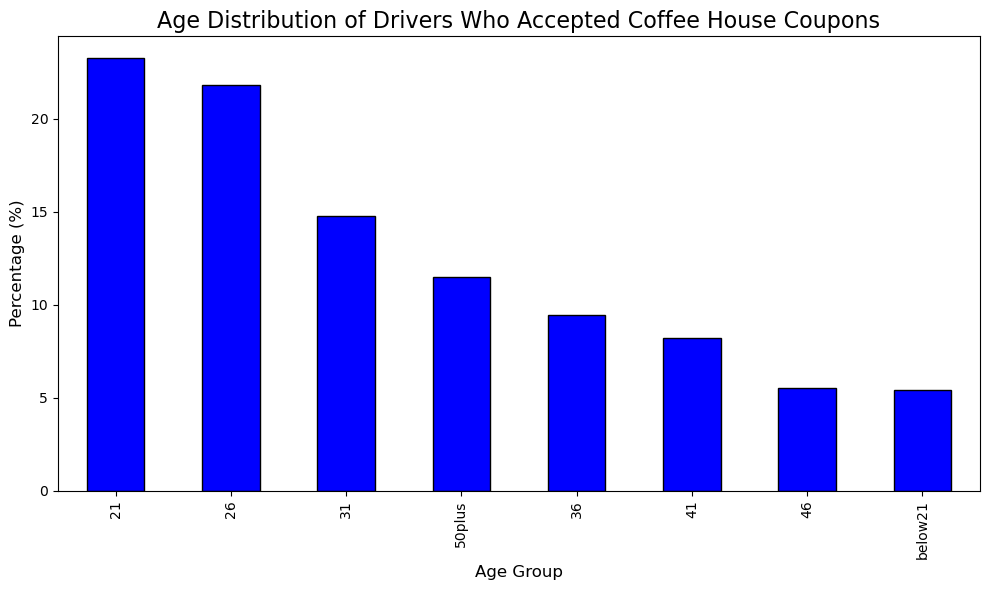

In [33]:
# I want to investigate the age distribution of the drivers who accepted coffee house coupons 


# Filter the data for drivers who accepted Coffee House coupons 
accepted_coffeehouse_coupon = data[(data['Y'] == 1) & (data['coupon'] == 'Coffee House')]

# Get the distribution of age for those who accepted the Coffee House coupon
age_distribution = accepted_coffeehouse_coupon['age'].value_counts(normalize=True) * 100

# Display the age distribution
print(age_distribution)

# Create a bar graph for the age distribution
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='blue', edgecolor='black')

# Add labels and title to the graph
plt.title('Age Distribution of Drivers Who Accepted Coffee House Coupons', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


We can see age groups 21 to 31 have the highest coffee house coupons acccetance rate. 